<a href="https://colab.research.google.com/github/abinarain/DMWAS/blob/master/ProjectMOA1GdscErlotinibAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Author: Abhishek N. Singh
#Description: This script evaluates the AUC value for a drug when acting against cell viability such 
#as cancer cells, and then I try to fit a regression model for Gdsc data
#Date: 26th December 2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import seaborn as sns





In [3]:
dataset = pd.read_csv("gdsc_Erlotinib_auc.csv", delimiter=",")

In [4]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,exp_UPF1,exp_ACSM3,exp_CREBBP,exp_TBXA2R,exp_IFRD1,exp_ADIPOR2,exp_FMO1,exp_SPAST,exp_STRAP,exp_TOMM34,exp_TNFRSF1B,exp_TBPL1,exp_ZZZ3,exp_TUBG2,exp_FLT4,exp_C2orf83,exp_NNAT,exp_CYFIP2,exp_WNK1,exp_HDAC7,exp_NCKAP1,exp_SUGP2,exp_ANKS1A,exp_CYB5R4,exp_SLC9A7,exp_NFYC,exp_ZBTB11,exp_EML1,exp_FGFR3,exp_HEATR6,exp_REEP1,exp_GPR116,exp_ST6GALNAC2,exp_ZFYVE26,exp_PDE8A,exp_ADAM11,exp_NUAK1,exp_PTPLAD1,...,exp_MECR,exp_EXD2,exp_INADL,exp_PGLS,exp_ARIH2,exp_ORM1,exp_NBR2,exp_MMP25,exp_CDCP1,exp_TNP1,exp_ADRA2C,exp_MGAM,exp_PLCB3,exp_CHRM3,exp_GAD2,exp_NEUROD4,exp_AFF3,exp_JAK3,exp_FAM169A,exp_USP48,exp_FAM182B,exp_TPM3,exp_PTTG3P,exp_STT3A,exp_NEK4,exp_STX17,exp_PIGP,exp_SPRY1,exp_ETNK1,exp_DLGAP5,exp_HMG20A,exp_RHOBTB1,exp_CDKN1B,exp_MCCC1,exp_KAL1,exp_ICMT,exp_HBD,exp_RAI2,exp_MECOM,Erlotinib
0,0,22RV1,6.011028,4.955063,5.498606,4.615622,8.981380,8.596295,5.983356,4.978231,NaN,6.594367,4.577073,9.539299,8.105715,4.419789,7.003484,4.287194,4.398404,5.426448,NaN,5.632297,9.282932,5.413248,7.329596,6.228573,4.371101,5.202511,8.515883,4.679146,5.538737,5.407479,4.833182,4.972518,4.847553,5.746806,6.419034,NaN,6.868150,NaN,...,6.880950,5.979614,4.695493,9.026928,6.084753,4.594327,5.246468,4.512440,4.355047,4.352557,NaN,4.554207,5.861542,4.877526,NaN,4.654437,4.631872,4.599772,5.916250,NaN,5.388985,4.477246,5.406135,8.977606,6.499660,5.556760,9.365081,5.098325,6.410435,6.224192,NaN,4.799369,9.643505,8.248490,5.694492,7.657050,3.946700,NaN,4.595024,0.920409
1,1,23132-87,7.221385,4.693445,5.285347,4.483968,7.783506,9.588306,4.450641,5.313183,10.924331,9.073996,4.743517,8.645856,8.492360,NaN,5.313581,4.671841,4.805151,5.003717,8.677782,5.367765,9.682706,5.916632,6.792334,NaN,4.394155,6.225076,7.587768,4.322592,5.565982,5.685577,4.365391,4.670494,5.780187,6.360626,7.840607,5.067308,5.605796,7.209583,...,7.537502,NaN,5.112914,10.150078,NaN,4.420781,5.845045,NaN,8.412018,4.682327,NaN,4.720568,6.912968,5.692177,NaN,4.429016,NaN,4.455790,4.728774,6.616857,4.518463,4.333330,5.956245,9.247870,7.332190,6.360304,10.140100,6.336477,6.264391,8.407566,6.664384,6.601413,8.876646,8.209376,4.202259,8.476935,3.937762,4.625224,6.032015,0.920409
2,2,380,6.333542,4.540520,NaN,5.006537,7.234994,9.767943,4.743530,5.211246,10.454959,6.665818,6.025225,8.554368,NaN,3.926918,NaN,NaN,4.427993,9.844344,9.234862,5.487743,4.730259,6.928151,NaN,9.262168,4.719380,6.581358,7.884421,4.145687,4.558922,4.471687,4.766379,4.810789,5.356899,6.533133,8.438167,4.962530,4.713554,NaN,...,6.152465,5.111161,4.526724,8.914593,6.028840,3.949027,5.058079,4.725097,4.475021,4.251298,5.037131,NaN,5.999143,4.725542,4.217727,NaN,5.693792,NaN,4.668861,6.738761,4.890169,4.156773,6.328307,8.279082,7.771402,6.066929,10.009280,NaN,6.480482,9.593730,7.573112,6.577179,10.220242,8.712841,4.653557,7.035348,4.085890,4.451836,NaN,0.920409
3,3,5637,NaN,4.191893,5.548728,4.340719,10.160300,8.659492,4.592338,5.391291,11.289558,7.295339,NaN,9.074011,NaN,5.275854,4.686596,NaN,4.390406,4.295362,8.600219,5.264866,9.691075,5.893263,7.172468,7.159088,4.224743,5.252526,8.590899,4.131593,4.313265,6.769021,4.410168,4.358750,8.342615,7.212660,9.277639,4.850959,10.316665,8.350423,...,7.175446,6.682939,NaN,9.998560,6.099948,NaN,NaN,4.571041,8.628757,NaN,4.889944,4.490345,5.969057,4.098976,4.150215,4.591577,4.497270,NaN,6.395097,6.651579,4.561720,4.121915,5.030438,9.731749,NaN,6.183316,NaN,5.018919,NaN,7.336713,5.648026,4.859240,NaN,7.393479,7.257985,8.142954,NaN,4.048923,5.652656,0.920409
4,4,639-V,7.353253,4.174989,5.372696,4.606393,9.150973,9.619724,4.476897,5.673377,12.214602,9.388058,4.826211,NaN,8.497498,5.484880,4.481965,NaN,NaN,5.208375,9.262031,NaN,10.415553,6.809589,7.754673,7.625387,4.530174,5.715454,9.050930,NaN,4.258830,6.526623,7.859751,4.637973,NaN,6.638820,8.283675,4.889619,6.948637,8.358112,...,7.493072,NaN,4.730513,9.850367,7.018422,4.022909,NaN,4.977143,10.167123,4.768873,5.241929,NaN,6.038450,4.289351,4.236318,4.427634,4.479870,4.222765,8.510756,6.113480,4.446873,4.150597,5

In [5]:
dataset.shape

(131, 981)

In [6]:
#So 1124 samples with 981 features

In [ ]:
#The first two column feature variables are not needed for data modeling and can be dropped.

In [7]:
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [8]:
dataset.head()

,exp_UPF1,exp_ACSM3,exp_CREBBP,exp_TBXA2R,exp_IFRD1,exp_ADIPOR2,exp_FMO1,exp_SPAST,exp_STRAP,exp_TOMM34,exp_TNFRSF1B,exp_TBPL1,exp_ZZZ3,exp_TUBG2,exp_FLT4,exp_C2orf83,exp_NNAT,exp_CYFIP2,exp_WNK1,exp_HDAC7,exp_NCKAP1,exp_SUGP2,exp_ANKS1A,exp_CYB5R4,exp_SLC9A7,exp_NFYC,exp_ZBTB11,exp_EML1,exp_FGFR3,exp_HEATR6,exp_REEP1,exp_GPR116,exp_ST6GALNAC2,exp_ZFYVE26,exp_PDE8A,exp_ADAM11,exp_NUAK1,exp_PTPLAD1,exp_WDR62,exp_RAB7A,...,exp_MECR,exp_EXD2,exp_INADL,exp_PGLS,exp_ARIH2,exp_ORM1,exp_NBR2,exp_MMP25,exp_CDCP1,exp_TNP1,exp_ADRA2C,exp_MGAM,exp_PLCB3,exp_CHRM3,exp_GAD2,exp_NEUROD4,exp_AFF3,exp_JAK3,exp_FAM169A,exp_USP48,exp_FAM182B,exp_TPM3,exp_PTTG3P,exp_STT3A,exp_NEK4,exp_STX17,exp_PIGP,exp_SPRY1,exp_ETNK1,exp_DLGAP5,exp_HMG20A,exp_RHOBTB1,exp_CDKN1B,exp_MCCC1,exp_KAL1,exp_ICMT,exp_HBD,exp_RAI2,exp_MECOM,Erlotinib
0,6.011028,4.955063,5.498606,4.615622,8.981380,8.596295,5.983356,4.978231,NaN,6.594367,4.577073,9.539299,8.105715,4.419789,7.003484,4.287194,4.398404,5.426448,NaN,5.632297,9.282932,5.413248,7.329596,6.228573,4.371101,5.202511,8.515883,4.679146,5.538737,5.407479,4.833182,4.972518,4.847553,5.746806,6.419034,NaN,6.868150,NaN,5.174451,NaN,...,6.880950,5.979614,4.695493,9.026928,6.084753,4.594327,5.246468,4.512440,4.355047,4.352557,NaN,4.554207,5.861542,4.877526,NaN,4.654437,4.631872,4.599772,5.916250,NaN,5.388985,4.477246,5.406135,8.977606,6.499660,5.556760,9.365081,5.098325,6.410435,6.224192,NaN,4.799369,9.643505,8.248490,5.694492,7.657050,3.946700,NaN,4.595024,0.920409
1,7.221385,4.693445,5.285347,4.483968,7.783506,9.588306,4.450641,5.313183,10.924331,9.073996,4.743517,8.645856,8.492360,NaN,5.313581,4.671841,4.805151,5.003717,8.677782,5.367765,9.682706,5.916632,6.792334,NaN,4.394155,6.225076,7.587768,4.322592,5.565982,5.685577,4.365391,4.670494,5.780187,6.360626,7.840607,5.067308,5.605796,7.209583,5.816199,NaN,...,7.537502,NaN,5.112914,10.150078,NaN,4.420781,5.845045,NaN,8.412018,4.682327,NaN,4.720568,6.912968,5.692177,NaN,4.429016,NaN,4.455790,4.728774,6.616857,4.518463,4.333330,5.956245,9.247870,7.332190,6.360304,10.140100,6.336477,6.264391,8.407566,6.664384,6.601413,8.876646,8.209376,4.202259,8.476935,3.937762,4.625224,6.032015,0.920409
2,6.333542,4.540520,NaN,5.006537,7.234994,9.767943,4.743530,5.211246,10.454959,6.665818,6.025225,8.554368,NaN,3.926918,NaN,NaN,4.427993,9.844344,9.234862,5.487743,4.730259,6.928151,NaN,9.262168,4.719380,6.581358,7.884421,4.145687,4.558922,4.471687,4.766379,4.810789,5.356899,6.533133,8.438167,4.962530,4.713554,NaN,5.180389,8.657388,...,6.152465,5.111161,4.526724,8.914593,6.028840,3.949027,5.058079,4.725097,4.475021,4.251298,5.037131,NaN,5.999143,4.725542,4.217727,NaN,5.693792,NaN,4.668861,6.738761,4.890169,4.156773,6.328307,8.279082,7.771402,6.066929,10.009280,NaN,6.480482,9.593730,7.573112,6.577179,10.220242,8.712841,4.653557,7.035348,4.085890,4.451836,NaN,0.920409
3,NaN,4.191893,5.548728,4.340719,10.160300,8.659492,4.592338,5.391291,11.289558,7.295339,NaN,9.074011,NaN,5.275854,4.686596,NaN,4.390406,4.295362,8.600219,5.264866,9.691075,5.893263,7.172468,7.159088,4.224743,5.252526,8.590899,4.131593,4.313265,6.769021,4.410168,4.358750,8.342615,7.212660,9.277639,4.850959,10.316665,8.350423,4.691851,8.939281,...,7.175446,6.682939,NaN,9.998560,6.099948,NaN,NaN,4.571041,8.628757,NaN,4.889944,4.490345,5.969057,4.098976,4.150215,4.591577,4.497270,NaN,6.395097,6.651579,4.561720,4.121915,5.030438,9.731749,NaN,6.183316,NaN,5.018919,NaN,7.336713,5.648026,4.859240,NaN,7.393479,7.257985,8.142954,NaN,4.048923,5.652656,0.920409
4,7.353253,4.174989,5.372696,4.606393,9.150973,9.619724,4.476897,5.673377,12.214602,9.388058,4.826211,NaN,8.497498,5.484880,4.481965,NaN,NaN,5.208375,9.262031,NaN,10.415553,6.809589,7.754673,7.625387,4.530174,5.715454,9.050930,NaN,4.258830,6.526623,7.859751,4.637973,NaN,6.638820,8.283675,4.889619,6.948637,8.358112,4.756246,9.824541,...,7.493072,NaN,4.730513,9.850367,7.018422,4.022909,NaN,4.977143,10.167123,4.768873,5.241929,NaN,6.038450,4.289351,4.236318,4.427634,4.479870,4.222765,8

In [9]:
y = dataset.Erlotinib

In [10]:
y.head() # This is how our target variable looks like

0    0.920409
1    0.920409
2    0.920409
3    0.920409
4    0.920409
Name: Erlotinib, dtype: float64

In [11]:
y.describe() #Lets see how our target variable looks like in terms of its statistics

count    130.000000
mean       0.919754
std        0.057922
min        0.540766
25%        0.920409
50%        0.920409
75%        0.920409
max        1.000000
Name: Erlotinib, dtype: float64

In [12]:
#Lets extract the list of feature variables names to be used as predictors
features = list(dataset.columns.values) #Make a list of all of the columns in the df
features.pop(features.index('Erlotinib'))

'Erlotinib'

In [13]:
features #Here is the list of the feature column variable names 

['exp_UPF1',
 'exp_ACSM3',
 'exp_CREBBP',
 'exp_TBXA2R',
 'exp_IFRD1',
 'exp_ADIPOR2',
 'exp_FMO1',
 'exp_SPAST',
 'exp_STRAP',
 'exp_TOMM34',
 'exp_TNFRSF1B',
 'exp_TBPL1',
 'exp_ZZZ3',
 'exp_TUBG2',
 'exp_FLT4',
 'exp_C2orf83',
 'exp_NNAT',
 'exp_CYFIP2',
 'exp_WNK1',
 'exp_HDAC7',
 'exp_NCKAP1',
 'exp_SUGP2',
 'exp_ANKS1A',
 'exp_CYB5R4',
 'exp_SLC9A7',
 'exp_NFYC',
 'exp_ZBTB11',
 'exp_EML1',
 'exp_FGFR3',
 'exp_HEATR6',
 'exp_REEP1',
 'exp_GPR116',
 'exp_ST6GALNAC2',
 'exp_ZFYVE26',
 'exp_PDE8A',
 'exp_ADAM11',
 'exp_NUAK1',
 'exp_PTPLAD1',
 'exp_WDR62',
 'exp_RAB7A',
 'exp_GPC4',
 'exp_ACTL6B',
 'exp_CAPZB',
 'exp_PIAS2',
 'exp_PMS2P1',
 'exp_TNS1',
 'exp_SCGN',
 'exp_PSEN1',
 'exp_XPO1',
 'exp_OXCT1',
 'exp_CD59',
 'exp_AQP6',
 'exp_RBM22',
 'exp_KCNH4',
 'exp_LAG3',
 'exp_CCNK',
 'exp_RGS17',
 'exp_ANGPT2',
 'exp_PHGDH',
 'exp_SEMA4G',
 'exp_SIRT1',
 'exp_KLHL22',
 'exp_PACSIN2',
 'exp_ASCC2',
 'exp_IFT27',
 'exp_TRMU',
 'exp_PYGL',
 'exp_CHD8',
 'exp_TUBB1',
 'exp_CDC25B',
 'e

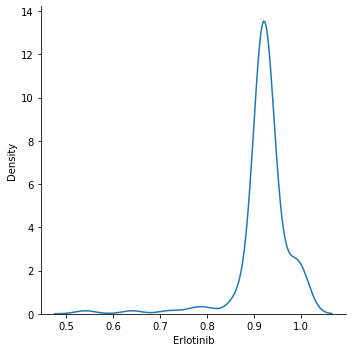

In [14]:
sns.displot(y, kind="kde")

In [14]:
# So we can see that the target values have skewed distribution with a long initial tail


In [15]:
X = dataset[features]

In [16]:
X.head()

,exp_UPF1,exp_ACSM3,exp_CREBBP,exp_TBXA2R,exp_IFRD1,exp_ADIPOR2,exp_FMO1,exp_SPAST,exp_STRAP,exp_TOMM34,exp_TNFRSF1B,exp_TBPL1,exp_ZZZ3,exp_TUBG2,exp_FLT4,exp_C2orf83,exp_NNAT,exp_CYFIP2,exp_WNK1,exp_HDAC7,exp_NCKAP1,exp_SUGP2,exp_ANKS1A,exp_CYB5R4,exp_SLC9A7,exp_NFYC,exp_ZBTB11,exp_EML1,exp_FGFR3,exp_HEATR6,exp_REEP1,exp_GPR116,exp_ST6GALNAC2,exp_ZFYVE26,exp_PDE8A,exp_ADAM11,exp_NUAK1,exp_PTPLAD1,exp_WDR62,exp_RAB7A,...,exp_MARCH8,exp_MECR,exp_EXD2,exp_INADL,exp_PGLS,exp_ARIH2,exp_ORM1,exp_NBR2,exp_MMP25,exp_CDCP1,exp_TNP1,exp_ADRA2C,exp_MGAM,exp_PLCB3,exp_CHRM3,exp_GAD2,exp_NEUROD4,exp_AFF3,exp_JAK3,exp_FAM169A,exp_USP48,exp_FAM182B,exp_TPM3,exp_PTTG3P,exp_STT3A,exp_NEK4,exp_STX17,exp_PIGP,exp_SPRY1,exp_ETNK1,exp_DLGAP5,exp_HMG20A,exp_RHOBTB1,exp_CDKN1B,exp_MCCC1,exp_KAL1,exp_ICMT,exp_HBD,exp_RAI2,exp_MECOM
0,6.011028,4.955063,5.498606,4.615622,8.981380,8.596295,5.983356,4.978231,NaN,6.594367,4.577073,9.539299,8.105715,4.419789,7.003484,4.287194,4.398404,5.426448,NaN,5.632297,9.282932,5.413248,7.329596,6.228573,4.371101,5.202511,8.515883,4.679146,5.538737,5.407479,4.833182,4.972518,4.847553,5.746806,6.419034,NaN,6.868150,NaN,5.174451,NaN,...,NaN,6.880950,5.979614,4.695493,9.026928,6.084753,4.594327,5.246468,4.512440,4.355047,4.352557,NaN,4.554207,5.861542,4.877526,NaN,4.654437,4.631872,4.599772,5.916250,NaN,5.388985,4.477246,5.406135,8.977606,6.499660,5.556760,9.365081,5.098325,6.410435,6.224192,NaN,4.799369,9.643505,8.248490,5.694492,7.657050,3.946700,NaN,4.595024
1,7.221385,4.693445,5.285347,4.483968,7.783506,9.588306,4.450641,5.313183,10.924331,9.073996,4.743517,8.645856,8.492360,NaN,5.313581,4.671841,4.805151,5.003717,8.677782,5.367765,9.682706,5.916632,6.792334,NaN,4.394155,6.225076,7.587768,4.322592,5.565982,5.685577,4.365391,4.670494,5.780187,6.360626,7.840607,5.067308,5.605796,7.209583,5.816199,NaN,...,6.986678,7.537502,NaN,5.112914,10.150078,NaN,4.420781,5.845045,NaN,8.412018,4.682327,NaN,4.720568,6.912968,5.692177,NaN,4.429016,NaN,4.455790,4.728774,6.616857,4.518463,4.333330,5.956245,9.247870,7.332190,6.360304,10.140100,6.336477,6.264391,8.407566,6.664384,6.601413,8.876646,8.209376,4.202259,8.476935,3.937762,4.625224,6.032015
2,6.333542,4.540520,NaN,5.006537,7.234994,9.767943,4.743530,5.211246,10.454959,6.665818,6.025225,8.554368,NaN,3.926918,NaN,NaN,4.427993,9.844344,9.234862,5.487743,4.730259,6.928151,NaN,9.262168,4.719380,6.581358,7.884421,4.145687,4.558922,4.471687,4.766379,4.810789,5.356899,6.533133,8.438167,4.962530,4.713554,NaN,5.180389,8.657388,...,7.135066,6.152465,5.111161,4.526724,8.914593,6.028840,3.949027,5.058079,4.725097,4.475021,4.251298,5.037131,NaN,5.999143,4.725542,4.217727,NaN,5.693792,NaN,4.668861,6.738761,4.890169,4.156773,6.328307,8.279082,7.771402,6.066929,10.009280,NaN,6.480482,9.593730,7.573112,6.577179,10.220242,8.712841,4.653557,7.035348,4.085890,4.451836,NaN
3,NaN,4.191893,5.548728,4.340719,10.160300,8.659492,4.592338,5.391291,11.289558,7.295339,NaN,9.074011,NaN,5.275854,4.686596,NaN,4.390406,4.295362,8.600219,5.264866,9.691075,5.893263,7.172468,7.159088,4.224743,5.252526,8.590899,4.131593,4.313265,6.769021,4.410168,4.358750,8.342615,7.212660,9.277639,4.850959,10.316665,8.350423,4.691851,8.939281,...,6.467205,7.175446,6.682939,NaN,9.998560,6.099948,NaN,NaN,4.571041,8.628757,NaN,4.889944,4.490345,5.969057,4.098976,4.150215,4.591577,4.497270,NaN,6.395097,6.651579,4.561720,4.121915,5.030438,9.731749,NaN,6.183316,NaN,5.018919,NaN,7.336713,5.648026,4.859240,NaN,7.393479,7.257985,8.142954,NaN,4.048923,5.652656
4,7.353253,4.174989,5.372696,4.606393,9.150973,9.619724,4.476897,5.673377,12.214602,9.388058,4.826211,NaN,8.497498,5.484880,4.481965,NaN,NaN,5.208375,9.262031,NaN,10.415553,6.809589,7.754673,7.625387,4.530174,5.715454,9.050930,NaN,4.258830,6.526623,7.859751,4.637973,NaN,6.638820,8.283675,4.889619,6.948637,8.358112,4.756246,9.824541,...,NaN,7.493072,NaN,4.730513,9.850367,7.018422,4.022909,NaN,4.977143,10.167123,4.768873,5.241929,NaN,6.038450,4.289351,4.236318,4.427634,4.479870,4.222765,8

In [17]:
#Counting the total number of NaNs in each columns
NaN4Features = X.isnull().sum()

In [18]:
print(NaN4Features)

exp_UPF1       9
exp_ACSM3     12
exp_CREBBP    11
exp_TBXA2R     9
exp_IFRD1      9
              ..
exp_KAL1      11
exp_ICMT      10
exp_HBD       18
exp_RAI2      17
exp_MECOM     24
Length: 978, dtype: int64


In [ ]:
#This means that each of the feature columns have 106 /1061 = 10% as NaN values that should be imputed

In [19]:
#Total sum of NaN values in the dataset
X.isnull().values.sum()

13292

In [20]:
109536 / 981 #Dividing the total number of NaNs by total number of features

111.65749235474006

In [ ]:
#This is the same number of NaNs per column variable as we calculated earlier

In [ ]:
#

In [21]:
#Now I am imputing the missing values by median although more sophisticated methods such as kNN or Bayesian imputation can also be used
X = X.fillna(X.median())

In [22]:
X.head()

,exp_UPF1,exp_ACSM3,exp_CREBBP,exp_TBXA2R,exp_IFRD1,exp_ADIPOR2,exp_FMO1,exp_SPAST,exp_STRAP,exp_TOMM34,exp_TNFRSF1B,exp_TBPL1,exp_ZZZ3,exp_TUBG2,exp_FLT4,exp_C2orf83,exp_NNAT,exp_CYFIP2,exp_WNK1,exp_HDAC7,exp_NCKAP1,exp_SUGP2,exp_ANKS1A,exp_CYB5R4,exp_SLC9A7,exp_NFYC,exp_ZBTB11,exp_EML1,exp_FGFR3,exp_HEATR6,exp_REEP1,exp_GPR116,exp_ST6GALNAC2,exp_ZFYVE26,exp_PDE8A,exp_ADAM11,exp_NUAK1,exp_PTPLAD1,exp_WDR62,exp_RAB7A,...,exp_MARCH8,exp_MECR,exp_EXD2,exp_INADL,exp_PGLS,exp_ARIH2,exp_ORM1,exp_NBR2,exp_MMP25,exp_CDCP1,exp_TNP1,exp_ADRA2C,exp_MGAM,exp_PLCB3,exp_CHRM3,exp_GAD2,exp_NEUROD4,exp_AFF3,exp_JAK3,exp_FAM169A,exp_USP48,exp_FAM182B,exp_TPM3,exp_PTTG3P,exp_STT3A,exp_NEK4,exp_STX17,exp_PIGP,exp_SPRY1,exp_ETNK1,exp_DLGAP5,exp_HMG20A,exp_RHOBTB1,exp_CDKN1B,exp_MCCC1,exp_KAL1,exp_ICMT,exp_HBD,exp_RAI2,exp_MECOM
0,6.011028,4.955063,5.498606,4.615622,8.981380,8.596295,5.983356,4.978231,10.857741,6.594367,4.577073,9.539299,8.105715,4.419789,7.003484,4.287194,4.398404,5.426448,9.224713,5.632297,9.282932,5.413248,7.329596,6.228573,4.371101,5.202511,8.515883,4.679146,5.538737,5.407479,4.833182,4.972518,4.847553,5.746806,6.419034,4.896296,6.868150,7.618271,5.174451,9.070666,...,6.954157,6.880950,5.979614,4.695493,9.026928,6.084753,4.594327,5.246468,4.512440,4.355047,4.352557,5.156294,4.554207,5.861542,4.877526,4.217727,4.654437,4.631872,4.599772,5.916250,6.476589,5.388985,4.477246,5.406135,8.977606,6.499660,5.556760,9.365081,5.098325,6.410435,6.224192,6.681861,4.799369,9.643505,8.248490,5.694492,7.657050,3.946700,4.473745,4.595024
1,7.221385,4.693445,5.285347,4.483968,7.783506,9.588306,4.450641,5.313183,10.924331,9.073996,4.743517,8.645856,8.492360,5.402846,5.313581,4.671841,4.805151,5.003717,8.677782,5.367765,9.682706,5.916632,6.792334,6.863348,4.394155,6.225076,7.587768,4.322592,5.565982,5.685577,4.365391,4.670494,5.780187,6.360626,7.840607,5.067308,5.605796,7.209583,5.816199,9.070666,...,6.986678,7.537502,6.348010,5.112914,10.150078,6.359573,4.420781,5.845045,4.716783,8.412018,4.682327,5.156294,4.720568,6.912968,5.692177,4.217727,4.429016,4.400970,4.455790,4.728774,6.616857,4.518463,4.333330,5.956245,9.247870,7.332190,6.360304,10.140100,6.336477,6.264391,8.407566,6.664384,6.601413,8.876646,8.209376,4.202259,8.476935,3.937762,4.625224,6.032015
2,6.333542,4.540520,5.406009,5.006537,7.234994,9.767943,4.743530,5.211246,10.454959,6.665818,6.025225,8.554368,8.617570,3.926918,5.143186,4.471246,4.427993,9.844344,9.234862,5.487743,4.730259,6.928151,7.304797,9.262168,4.719380,6.581358,7.884421,4.145687,4.558922,4.471687,4.766379,4.810789,5.356899,6.533133,8.438167,4.962530,4.713554,7.618271,5.180389,8.657388,...,7.135066,6.152465,5.111161,4.526724,8.914593,6.028840,3.949027,5.058079,4.725097,4.475021,4.251298,5.037131,4.686228,5.999143,4.725542,4.217727,4.582385,5.693792,4.446560,4.668861,6.738761,4.890169,4.156773,6.328307,8.279082,7.771402,6.066929,10.009280,5.823459,6.480482,9.593730,7.573112,6.577179,10.220242,8.712841,4.653557,7.035348,4.085890,4.451836,5.084881
3,6.537005,4.191893,5.548728,4.340719,10.160300,8.659492,4.592338,5.391291,11.289558,7.295339,4.828074,9.074011,8.617570,5.275854,4.686596,4.471246,4.390406,4.295362,8.600219,5.264866,9.691075,5.893263,7.172468,7.159088,4.224743,5.252526,8.590899,4.131593,4.313265,6.769021,4.410168,4.358750,8.342615,7.212660,9.277639,4.850959,10.316665,8.350423,4.691851,8.939281,...,6.467205,7.175446,6.682939,4.871704,9.998560,6.099948,4.229748,5.302310,4.571041,8.628757,4.544944,4.889944,4.490345,5.969057,4.098976,4.150215,4.591577,4.497270,4.446560,6.395097,6.651579,4.561720,4.121915,5.030438,9.731749,7.118064,6.183316,9.703404,5.018919,6.469569,7.336713,5.648026,4.859240,8.491278,7.393479,7.257985,8.142954,4.088423,4.048923,5.652656
4,7.353253,4.174989,5.372696,4.606393,9.150973,9.619724,4.476897,5.673377,12.214602,9.388058,4.826211,8.980224,8.497498,5.484880,4.481965,4.471246,4.528343,5.208375,9.262031,5.517819,10.415553,6.809589,7.754673,7.625387,4.530174,5.715454,9.050930,4.410097,4.258830,

In [30]:
#Now checking for NaN in target variable
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130     True
Name: Erlotinib, Length: 131, dtype: bool

In [ ]:
#So there is no NaN value in target

In [ ]:
#Now I split the predictors and target into train and test

In [31]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=3)

In [32]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

Now doing Dimensionality reduction

In [33]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)

In [ ]:
#Now lets look how much variance is covered by the first two components

In [34]:
pcaObj.explained_variance_ratio_

array([0.1351344 , 0.06914459])

In [ ]:
#Clearly, using this method has lead to a very poor dimensionality reduction, given that the first two 
#components cover 10 + 7 = 17% variance only.

In [ ]:
#So now I use dimensionality reduction in order to preserve at least 95% of variance

In [35]:
pcaObj = PCA(n_components = 0.95)
pcaObj.fit(xTrain)
xTrainPCA95 = pcaObj.transform(xTrain)

In [36]:
pcaObj.explained_variance_ratio_

array([0.1351344 , 0.06914459, 0.05722982, 0.04873074, 0.03345418,
       0.03001749, 0.02569014, 0.02373926, 0.02224517, 0.02013822,
       0.01902433, 0.01814108, 0.01685239, 0.01611446, 0.01532517,
       0.01459847, 0.0144647 , 0.01378159, 0.01353747, 0.01302255,
       0.01222919, 0.01188608, 0.01149548, 0.01099328, 0.01058386,
       0.01048586, 0.01011874, 0.00994949, 0.00986863, 0.00945454,
       0.00903774, 0.00894604, 0.008689  , 0.00823597, 0.00800466,
       0.00797369, 0.00764964, 0.00751333, 0.00741335, 0.00717382,
       0.00689207, 0.00665161, 0.00654745, 0.00649002, 0.00634814,
       0.0062416 , 0.00600609, 0.00594879, 0.00585818, 0.00577972,
       0.00535864, 0.00527264, 0.00516614, 0.00512086, 0.00498314,
       0.00489284, 0.0047303 , 0.00461374, 0.00456278, 0.00440626,
       0.00429031, 0.00426794, 0.00410541, 0.00399076, 0.00391055,
       0.0038154 , 0.00379675, 0.00364636])

In [ ]:
#This also does not seem to be working given that in order to get 95% variance, there is hardly any reduction
#in dimension as we still have a lot of dimensions.

#Lets look at our data again

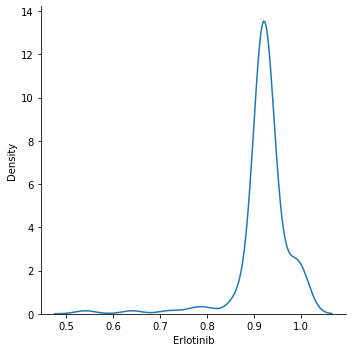

In [37]:
sns.displot(y, kind="kde")

In [ ]:
# Clearly, there is no point in having those data points where the value of Erlotinib y value is less
#than 0.8 . This is because we do not have adequate data points for those y values and it would be better if
# we discard those data values. This will also ensure that we have a more normal distribution. 


In [38]:
datasetGaussian = dataset[(dataset.Erlotinib>0.8)]

In [39]:
datasetGaussian.shape

(125, 979)

In [40]:
yGaussian = datasetGaussian.Erlotinib

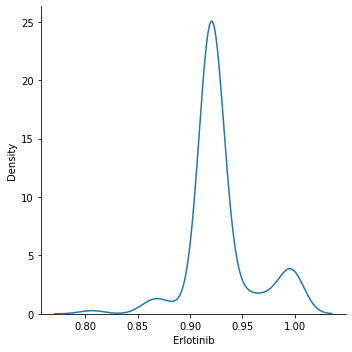

In [41]:
sns.displot(yGaussian, kind="kde")

In [ ]:
#Great, so we get rid of a lot of sparse data. 
#Now lets continue the procedure as earlier

In reality, the y distribution now is a comnination of multiple gaussian distribution, however, the datascience model will take care of this fact.

In [42]:
yGaussian.describe()

count    125.000000
mean       0.928922
std        0.030942
min        0.806265
25%        0.920409
50%        0.920409
75%        0.920409
max        1.000000
Name: Erlotinib, dtype: float64

In [43]:
features = list(datasetGaussian.columns.values) #Make a list of all of the columns in the df. Here note we are using datasetGaussian
features.pop(features.index('Erlotinib'))
X = datasetGaussian[features]
NaN4Features = X.isnull().sum()
X.isnull().values.sum()

12034

In [44]:
X = X.fillna(X.median()) #Imputing by median

In [45]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, yGaussian, test_size=0.3, random_state=3)

In [46]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

In [47]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.12833104, 0.07162039])

In [ ]:
#We see that there is only a slight improvement in percentage variance captured i.e., its 18% now.

In [ ]:
#Lets see if I can further improve it, by normalizing yGaussian


In [48]:
meanY = np.mean(yGaussian)
stdY = np.std(yGaussian)

In [49]:
meanY

0.9289223714353375

In [50]:
stdY

0.030817954129747582

In [51]:
yNorm = (yGaussian-meanY)/stdY


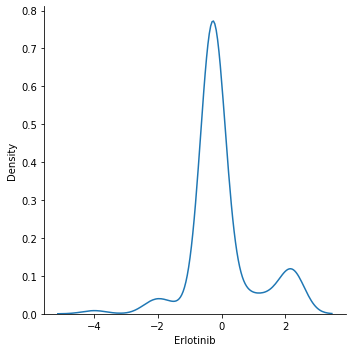

In [52]:
sns.displot(yNorm, kind="kde")

In [ ]:
#Lets Normalize X

In [53]:
meanX = np.mean(X)
stdX = np.std(X)

In [54]:
meanX.head()

exp_UPF1      6.594114
exp_ACSM3     4.703627
exp_CREBBP    5.402113
exp_TBXA2R    4.656111
exp_IFRD1     8.611885
dtype: float64

In [55]:
XNorm = (X-meanX)/stdX

In [56]:
XNorm = XNorm.fillna(X.median()) #Imputing by median

In [57]:
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yNorm, test_size=0.3, random_state=3)

In [58]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.10060257, 0.06453888])

In [ ]:
#This did not work either, as the cumulative variance percentage in fact got less.

In [59]:
#Lets try it with yGaussian, which has original y values. This will ensure that the model will predict the right
#values and not the normalized values
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yGaussian, test_size=0.3, random_state=3)

In [60]:
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.10060257, 0.06453888])

#Remarks: Despite using several strategies for dimensionality reduction, it does not seem to be working well, given that the combined variance of initial components looks to be very less despite all the strategies. 

For calculations ahead, I shall use the xTrain, xTest, yTrain and yTest as derived using yGaussian, as it will help me build a model that will give the true value of y (Erlotinib)

In [ ]:
#Lets try Polynomial Regression and then we will use ElasticNet

In [61]:
poly_features = PolynomialFeatures(degree=2, include_bias= False)

In [64]:
X_poly = poly_features.fit_transform(xTrain)

In [65]:
xTrain[0].shape

(978,)

In [66]:
xTrain.shape

(760, 978)

In [67]:
X_poly[0].shape

(479709,)

In [68]:
X_poly.shape

(760, 479709)

In [ ]:
#So we see that X_poly now has far more columns than xTrain which is a result of combination of all 2nd degree
# variables. Total attributes is equal to ( 1320 + 2 )! / (1320! 2!)

In [ ]:
#Now fitting a 

In [62]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly,yTrain)

This gave the error :Your session crashed after using all available RAM
Thus, I am abandoning polynomial fitting

In [ ]:
#If we had managed to do dimensionality reduction, then it would have made sense to carry out Polynomial fit.

In [63]:
#Lets start simple linear regression fit.
lin_reg = LinearRegression()

In [ ]:
#Lets first design a cross-validation set up as desired.
#For that I make use of GridSearch
#GridSearchCV should be used to find the optimal parameters to train your final model. 
#Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. 
#You should then take these parameters and train your final model on all of the data. It is important to 
#note that if you have trained your final model on all of your data, you cannot test it. For any correct test, 
#you must must reserve some of the data. That is why I am reserving the test data for the purpose.

In [64]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]} #Note that although I have done normalization, I am repeating it make a second normalization

In [65]:
grid_search = GridSearchCV(lin_reg, parameters, cv=5, scoring='r2', verbose=1, return_train_score=True)#Five fold cross validation




In [66]:
grid_search.fit(Xtrain, yTrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [67]:

print("Residual sum of squares: %.11f" % np.mean((grid_search.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00077607881


In [68]:
print('Best Score: ', grid_search.best_score_) #Gets the best R2 value score
print('Best Params: ', grid_search.best_params_) #Gets the parameter corresponding to it

Best Score:  -0.3132539990760992
Best Params:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [ ]:
#We see that the residual sum of square comes out to be close to zero in grid search

In [69]:
#Now doing Linear Regression WITHOUT Grid Search cross validation
model = LinearRegression()
model.fit(Xtrain, yTrain)
#predictions = model.predict(XTest)
print("r2/variance : ", model.score(Xtest,yTest))
print("Residual sum of squares: %.11f" % np.mean((model.predict(Xtest) - yTest) ** 2))

r2/variance :  -0.28557882391363565
Residual sum of squares: 0.00077607881


In [70]:
#Here the R2 score became  negative, and so the model is not as good as what we found by GridSearch

We see that R2 score is lowest for grid_search selected model. 


In [ ]:
#The simple linear regression can also help us get the coefficients of each of the feature variables which we can plot

In [71]:
featureCoefficients = pd.DataFrame() 
featureCoefficients["Features"] = pd.DataFrame(Xtrain).columns
featureCoefficients['PredictedValues'] = pd.Series(model.coef_) 

print(featureCoefficients) 

       Features  PredictedValues
0      exp_UPF1        -0.001032
1     exp_ACSM3        -0.002071
2    exp_CREBBP         0.002543
3    exp_TBXA2R         0.000495
4     exp_IFRD1         0.000156
..          ...              ...
973    exp_KAL1        -0.000087
974    exp_ICMT         0.001060
975     exp_HBD         0.000803
976    exp_RAI2         0.000339
977   exp_MECOM        -0.000402

[978 rows x 2 columns]


In [72]:
# find optimal alpha with grid search and Lasso Regression for regularization
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lasso = Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_) #Get best R2 score
print('Best Params: ', grid_result.best_params_) #Get the alpha parameter which corresponds to best results



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -0.0617645012315573
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.7s finished


In [73]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00062192477


We see that the residual sum of squares has dropped significantly compared to previous models. However, there is no significant improvement in R2 score compared to the model we obtained using GridSearch with simple linear regression model. The n_jobs=-1 takes in all available cores.


In [74]:
#Now making models for ElasticNet
elastic_net = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    2.9s


Best Score:  -0.0617645012315573
Best Params:  {'alpha': 0.1, 'l1_ratio': 0.2}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    6.9s finished


In [75]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00062192477


There is not much improvement in residual sum of squared than lasso. So essentially either lasso model or elasticnet model can be used which has the lowest residual sum of squares.

In [ ]:
#In order to get the coefficients of each of the predictors, we will now have 
#to build a model with the parameters as we obtained best by GridSearch

In [76]:
eNet = ElasticNet(alpha=10, l1_ratio= 0) 


In [77]:
eNet.fit(Xtrain, yTrain) 
  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026928210969783643, tolerance: 9.529590413601379e-06
  positive)


ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000,
           normalize=False, positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
# calculate the prediction and mean square error 
yPred = eNet.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2)) 
 

Mean Squared Error: 0.0005965191777703896


In [79]:
#Now lets get the coefficients
eNetCoeff = pd.DataFrame() 
eNetCoeff["Features"] = Xtrain.columns 
eNetCoeff['PredictedCoefficients'] = pd.Series(eNet.coef_) 

In [80]:
eNetCoeff

,Features,PredictedCoefficients
0,exp_UPF1,-0.000043
1,exp_ACSM3,0.000083
2,exp_CREBBP,-0.000005
3,exp_TBXA2R,-0.000005
4,exp_IFRD1,-0.000016
...,...,...
973,exp_KAL1,-0.000118
974,exp_ICMT,0.000034
975,exp_HBD,0.000295
976,exp_RAI2,0.000065


In [ ]:
#Now we use Random Forest in GRID Search for regression

In [91]:
param_grid = [
 {'n_estimators': [3, 10, 30,50,60], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [92]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [93]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
return_train_score=True)

In [94]:
grid_search.fit(Xtrain, yTrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [95]:
grid_search.best_params_


{'max_features': 2, 'n_estimators': 50}

In [96]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
 cvres = grid_search.cv_results_


In [98]:
 for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(np.sqrt(-mean_score), params)

0.042194755138865774 {'max_features': 2, 'n_estimators': 3}
0.03337929191780819 {'max_features': 2, 'n_estimators': 10}
0.034849145756476754 {'max_features': 2, 'n_estimators': 30}
0.03333348093007519 {'max_features': 2, 'n_estimators': 50}
0.03455427594279708 {'max_features': 2, 'n_estimators': 60}
0.0389617606202843 {'max_features': 4, 'n_estimators': 3}
0.035518892473455514 {'max_features': 4, 'n_estimators': 10}
0.033819436469529944 {'max_features': 4, 'n_estimators': 30}
0.03572453959413558 {'max_features': 4, 'n_estimators': 50}
0.03476411051698575 {'max_features': 4, 'n_estimators': 60}
0.04004324111231325 {'max_features': 6, 'n_estimators': 3}
0.036225804831863925 {'max_features': 6, 'n_estimators': 10}
0.03448113891308664 {'max_features': 6, 'n_estimators': 30}
0.03433896412851802 {'max_features': 6, 'n_estimators': 50}
0.03425672392338765 {'max_features': 6, 'n_estimators': 60}
0.039674581571370375 {'max_features': 8, 'n_estimators': 3}
0.03399025144575754 {'max_features': 8,

**We note that the RMSE for Training data is lowest of value 0.03333348093007519 for {'max_features': 2, 'n_estimators': 50}.**

In [103]:
# calculate the prediction and mean square error for Test data 
yPred = grid_search.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2))

Mean Squared Error: 0.000619000573736353


In [1]:
#We note that the mean squared error is also as low as I was getting with Lasso or Ridge Regression earlier. 

In [2]:
pip install dtreeviz

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 204.2MB 74kB/s 
     |████████████████████████████████| 204kB 16.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=c3cb60552b4dc9dc4ad6ffb4370e53ce62e9de733f8943bd9f133e6e82bb4022
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=21cca3b3e4576054d2495018964e9c04b1675149d9bb6f1c32d07b6d4485b21e
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [120]:
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [122]:
#Now making the tree with the best parameters obtained by random forest
forest_reg = RandomForestRegressor(max_features = 2, n_estimators = 50)


In [123]:
forest_reg.fit(Xtrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
def plotRandomForestR(model, X, Y):
    selected_genes = Xtrain.columns # get the feature names
    model.fit(X, Y)
    plt.figure(figsize=(20,20))
    _ = tree.plot_tree(model.estimators_[0], feature_names=selected_genes, filled=True)

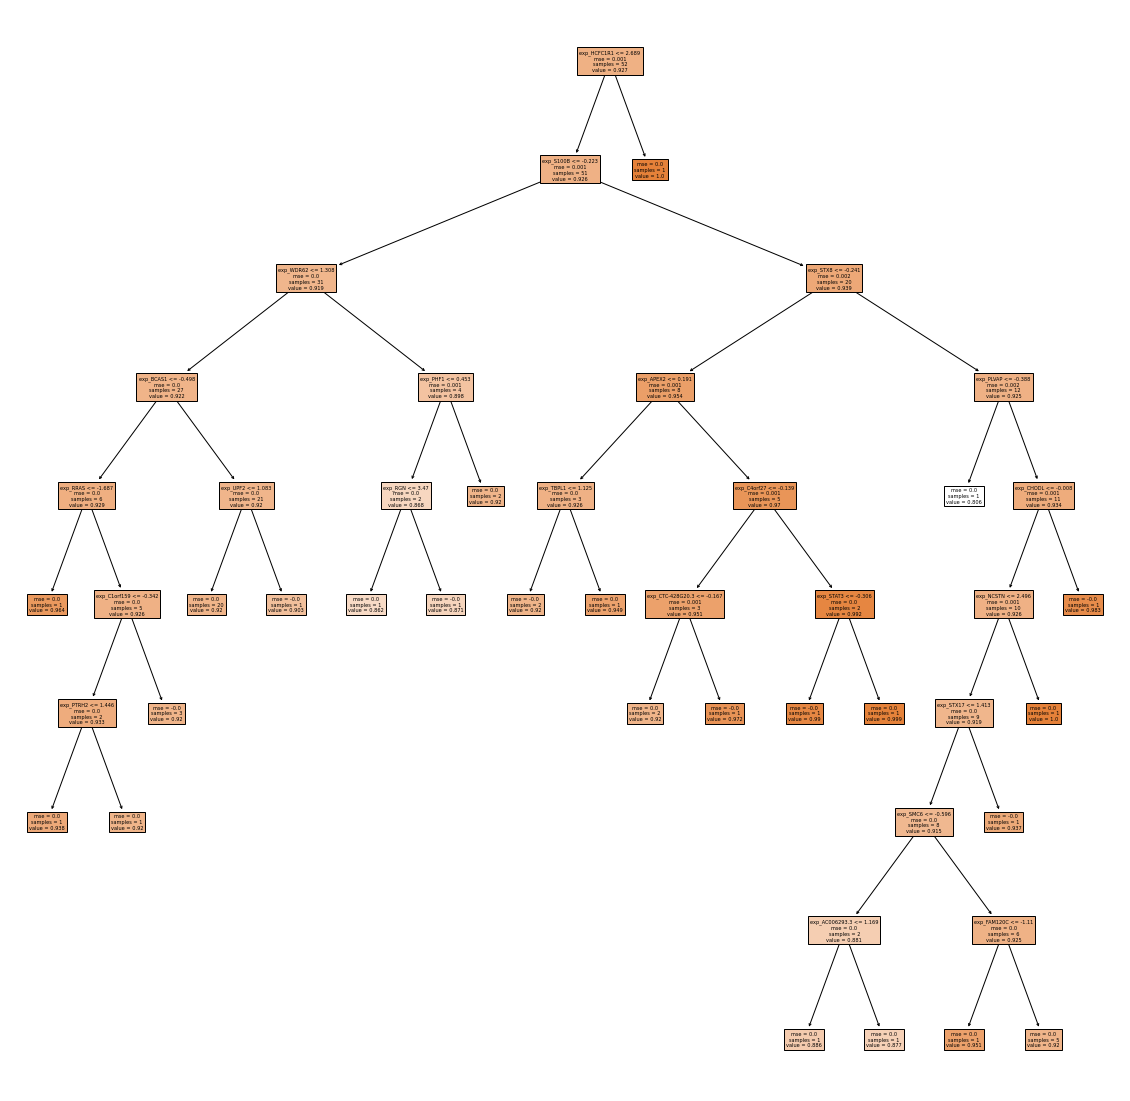

In [124]:
plotRandomForestR(forest_reg,Xtrain,yTrain)